In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [6]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_7/run_7_*_*.npy'):
    L = int(f.split("_")[3])
    n = int(f.split("_")[4].split(".")[0])
    data[L, n] = np.load(f, allow_pickle = True)

In [9]:
fails = np.empty((5, 10), dtype = np.float32)
for L, n in data:
    fails[L // 20 - 1, n % 10] = data[L, n]
fails[-1, -2:] = np.NaN

In [12]:
avg = np.nanmean(fails, axis = 1)

array([3.5900000e-04, 4.4000000e-05, 1.0000001e-05, 1.6000000e-05,
       7.4999998e-06], dtype=float32)

In [13]:
L_ticks = np.linspace(20, 100, 5)

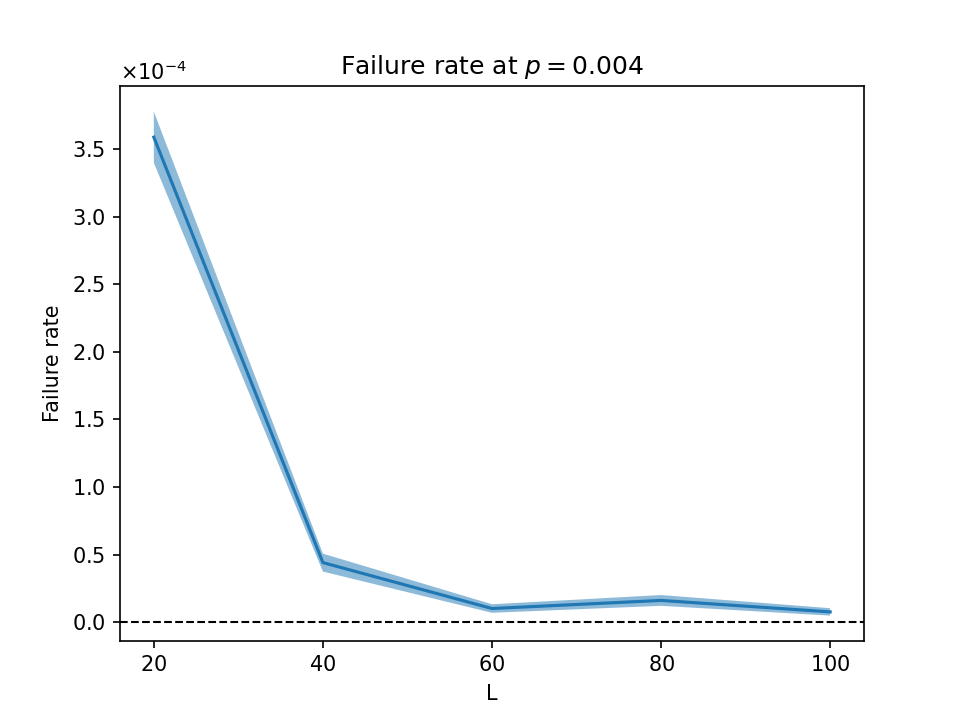

In [22]:
plt.plot(L_ticks, avg)
error = np.sqrt(avg * (1 - avg)) / 1000
plt.fill_between(L_ticks, avg - error, avg + error, alpha = 0.5)
plt.axhline(color = "k", lw = 1, linestyle = "--")
plt.xlabel("L")
plt.ylabel("Failure rate")
plt.title("Failure rate at $p=0.004$")
plt.xticks(L_ticks)
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run7.png")
plt.show()